In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns

## Regression

In [2]:
data = pd.read_csv("E:/DIU/6th Semestar/Artificial Intelligence Lab/Profit Prediction.csv")
data.head(10)


,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


In [3]:
#checking Null values
data.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [4]:
data.describe()

,Marketing Spend,Administration,Transport,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data["Area"].value_counts()

Area
Dhaka      17
Ctg        17
Rangpur    16
Name: count, dtype: int64

## One Hot Encoding 
### Dummy 

In [6]:
areadummies=pd.get_dummies (data.Area ,dtype = "int32")
areadummies.head()

,Ctg,Dhaka,Rangpur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [7]:
data.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [8]:
df = data.join(areadummies)
df.head()

,Marketing Spend,Administration,Transport,Area,Profit,Ctg,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,Dhaka,192261.83,0,1,0
1,162597.70,151377.59,443898.53,Ctg,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Rangpur,191050.39,0,0,1
3,144372.41,118671.85,383199.62,Dhaka,182901.99,0,1,0
4,142107.34,91391.77,366168.42,Rangpur,166187.94,0,0,1


### Train Test split


In [9]:
x = df.drop(['Area','Profit'],axis = 1)
x.head()

,Marketing Spend,Administration,Transport,Ctg,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,0,1,0
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,0,1,0
4,142107.34,91391.77,366168.42,0,0,1


In [10]:
y = df['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .2)
ytrain.head()

39     81005.76
15    129917.04
19    122776.86
33     96778.92
25    107404.34
Name: Profit, dtype: float64

# Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [14]:
xtrain_df = pd.DataFrame(xtrain_mms,columns = xtrain.columns)
xtest_df = pd.DataFrame(xtest_mms,columns = xtest.columns)
xtrain_df.head()

,Marketing Spend,Administration,Transport,Ctg,Dhaka,Rangpur
0,0.233194,0.241309,0.370931,1.0,0.0,0.0
1,1.000000,0.543030,0.554864,0.0,1.0,0.0
2,0.522650,0.778236,0.000000,0.0,1.0,0.0
3,0.335617,0.394134,0.454943,0.0,0.0,1.0
4,0.391080,0.671958,0.292427,1.0,0.0,0.0


# Linear Regression


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain_df,ytrain)

LinearRegression()

In [16]:
model.score(xtest_df,ytest)

0.9752335721627964

In [17]:
xtest.head(1)

,Marketing Spend,Administration,Transport,Ctg,Dhaka,Rangpur
29,65605.48,153032.06,107138.38,0,1,0


In [18]:
model.predict(xtest_df.head(1))

array([100787.48511167])

In [19]:
data.loc[25,"Profit"]

107404.34

## Best way to judge a model is finding Error

In [20]:
from sklearn import metrics
import numpy as np 

In [21]:
test_prediction = model.predict(xtest_df)
mae = metrics.mean_absolute_error(ytest,test_prediction)
mse = metrics.mean_squared_error(ytest,test_prediction)
print("MAE: ",mae)
print("MSE: ",mse)

MAE:  6060.75553984024
MSE:  53758473.91058408


## Ridge Regression

In [22]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()

In [23]:
model_ridge.fit(xtrain_df,ytrain)
model_ridge.predict(xtest_df.head(1))

array([105305.56673138])

In [24]:
ytrain.head(1)

39    81005.76
Name: Profit, dtype: float64

In [25]:
model_ridge.score(xtest_df,ytest)

0.9052185433700055

In [26]:
#Error
test_prediction = model_ridge.predict(xtest_df)
mae = metrics.mean_absolute_error(ytest,test_prediction)
mse = metrics.mean_squared_error(ytest,test_prediction)
print("MAE: ",mae)
print("MSE: ",mse)

MAE:  11312.117834090179
MSE:  205734411.79905057


## Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(xtrain_df,ytrain)


Lasso()

In [28]:
model_lasso.predict(xtest_df.head(1))

array([100785.18645469])

In [29]:
xtest_df.head(1)

,Marketing Spend,Administration,Transport,Ctg,Dhaka,Rangpur
0,0.396769,0.774566,0.227092,0.0,1.0,0.0


In [30]:
model_lasso.score(xtest_df,ytest)

0.9752204372955648

In [31]:
## Error
test_prediction = model_lasso.predict(xtest_df)
mae = metrics.mean_absolute_error(ytest,test_prediction)
mse = metrics.mean_squared_error(ytest,test_prediction)
print("MAE: ",mae)
print("MSE: ",mse)


MAE:  6063.481008217127
MSE:  53786984.700352654


# Classification

In [32]:
cancer_df = pd.read_csv("E:/DIU/6th Semestar/Artificial Intelligence Lab/Lab04/breast_cancer_dataframe.csv")
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [33]:
cancer_df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [34]:
# null value checking
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [35]:
# Train test Split
X = cancer_df.drop(['target'],axis = 1)
X.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [36]:
Y = cancer_df['target']
Y.head(2)

0    0
1    0
Name: target, dtype: int64

In [37]:

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc = sc.transform(xtest)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Support Vector Classifier 

In [40]:
from sklearn.svm import SVC
svc_class = SVC()


In [41]:
svc_class.fit(xtrain,ytrain)
prediction = svc_class.predict(xtest)
accuracy_score(ytest,prediction)

0.8859649122807017

In [42]:
#Train with standard scaled data
svc2 = SVC()
svc2.fit(xtrain_sc,ytrain)
pr = svc_class.predict(xtest_sc)
accuracy_score(ytest,pr)

C:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.6052631578947368

k--Nearest neighbor classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(xtrain,ytrain)







KNeighborsClassifier()

In [45]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Naive Bayes Classifier

In [46]:
from sklearn.naive_bayes import GaussianNB
nb_class = GaussianNB()
nb_class.fit(xtrain,ytrain)
pr = nb_class.predict(xtest)
accuracy_score(ytest,pr)

0.9649122807017544

## Tree based Algorithm

### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
pred = dtc.predict(xtest)
accuracy_score(ytest,pred)

0.9385964912280702

## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
pred = rfc.predict(xtest)
rfc.score(xtest,ytest)

0.9649122807017544

In [49]:
accuracy_score(ytest,pred)

0.9649122807017544

# Performance Evaluation

# Confusion Matrix

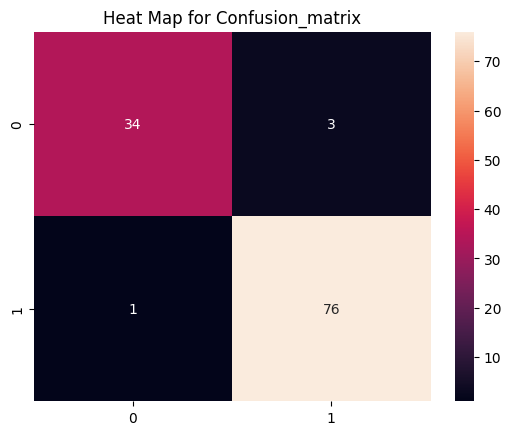

In [50]:
cm = confusion_matrix(ytest,pred)
plt.title("Heat Map for Confusion_matrix")
sns.heatmap(cm,annot = True)
plt.show()

In [51]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        37
           1       0.96      0.99      0.97        77

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [52]:
#cross validation 
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = rfc,X = X,y = Y,cv = 10)
print(cross_validation)
print("Validation mean accuracy of XGBoost model = ",cross_validation.mean())

[0.98245614 0.89473684 0.92982456 0.94736842 1.         0.98245614
 0.94736842 0.98245614 0.96491228 0.98214286]
Validation mean accuracy of XGBoost model =  0.9613721804511279


## Other Measurments

In [53]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,roc_auc_score,auc


In [54]:
print("f1 score: ",f1_score(ytest,rfc.predict(xtest),average = 'macro'))
print("precision : ",precision_score(ytest,rfc.predict(xtest),average = 'macro'))
print("Recall: ",recall_score(ytest,rfc.predict(xtest),average = 'macro'))

f1 score:  0.9594017094017093
precision :  0.9667269439421338
Recall:  0.952965952965953


# AUC Score and ROC Curve

In [55]:
probs = rfc.predict_proba(xtest)
probs = probs[:,1]
auc = roc_auc_score(ytest,probs)
fpr,tpr, _ = roc_curve(ytest,probs)
auc1 = metrics.auc(fpr,tpr)
print("AUC : ",auc1)

AUC :  0.9968409968409968


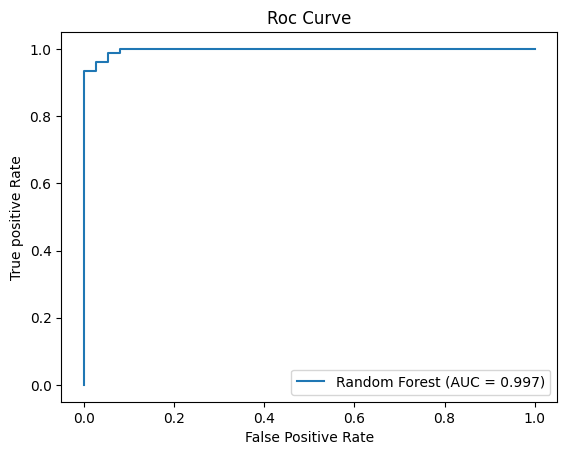

In [56]:

plt.plot(fpr,tpr,label = "Random Forest (AUC = %0.3f)" %auc1)
plt.title("Roc Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.legend()
plt.show()